## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [4]:
# find out the duration of the experiment
duration = np.array(pd.to_datetime(df.timestamp).sort_values(ascending=True))
total_duration = duration[-1] - duration[0]
days = total_duration.astype('timedelta64[D]')
days/np.timedelta64(1, 'D')

21.0

b. Use the below cell to find the number of rows in the dataset.

In [5]:
df.shape[0]

294478

> Number of rows in the dataset is 294478

c. The number of unique users in the dataset.

In [6]:
df['user_id'].nunique()

290584

> Number of unique users in the dataset is 290584

d. The proportion of users converted.

In [7]:
(df.converted==1).mean()

0.11965919355605512

> The proportion of users converted is 11.96%

e. The number of times the `new_page` and `treatment` don't line up.

In [8]:
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

> The number of times the new_page and treatment don't line up is 3893

f. Do any of the rows have missing values?

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


> No missing data in any column

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
df2=df[(((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == True)&(((df['group'] == 'control') == (df['landing_page'] == 'old_page')) == True)]

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
df2.user_id.nunique()

290584

> Number of unique users in the dataset is 290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
df2[df2.user_id.duplicated()].user_id.iloc[0]

773192

> The only user that is duplicated is 773192

c. What is the row information for the repeat **user_id**? 

In [14]:
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
df2.drop(2893, inplace=True)
df2[df2['user_id']==773192]

C:\Program Files (x86)\Anaconda\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
p_conv = df2.converted.mean()
p_conv

0.11959708724499628

> the probability of an individual converting regardless of the page they receive is 0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
p_conv_control = df2[df2.group == 'control'].converted.mean()
p_conv_control

0.1203863045004612

> Given that an individual was in the control group, the probability they converted is 0.12038

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
p_conv_treat=df2[df2['group']=='treatment'].converted.mean()
p_conv_treat

0.11880806551510564

> Given that an individual was in the treatment group, the probability they converted is 0.118808

d. What is the probability that an individual received the new page?

In [19]:
len(df2[df2['landing_page']=='new_page'])/len(df2['landing_page'])

0.5000619442226688

> the probability that an individual received the new page is 0.50006

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

- The probability that an individual received the new page is pretty much equal to receving old page at 0.50006. This shows that there is equal chance that an individual receive wither of the pages.
- Moreover, the conversion probability from control and treatment group different only to a 3rd decimal point and is therefore pretty same.
- With such clear probability values from the sample, it would be difficult to conclude that the one page leads to more conversions and the other less. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null Hypothesis:** The probability that the old page is better than new page is greater or equal to probability that the new page being better

**Alternative Hypothesis:** The probability of old page being better than new page is less than that of probability of new page being better

$$ H_{0} : p_{old} - p_{new} \geq 0$$
$$ H_{1} : p_{old} - p_{new} < 0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [20]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

> Convert rate for pnew under null is 0.11959

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [21]:
p_old = df2.converted.mean() # it is same as the new page
p_old

0.11959708724499628

c. What is $n_{new}$?

In [22]:
n_new = df2[df2.landing_page == 'new_page'].count()[0]
n_new

145310

> number of people who received new page = 145310

d. What is $n_{old}$?

In [23]:
n_old = df2[df2.landing_page == 'old_page'].count()[0]
n_old

145274

> Number of people receved the old page is 145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
new_page_converted = np.random.choice([0, 1], size=n_new, p=[(1 - p_new), p_new])
new_page_converted.mean()

0.1199917417934072

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted = np.random.choice([0, 1], size=n_old, p=[(1 - p_old), p_old])
old_page_converted.mean()

0.1202761677932734

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
new_page_converted.mean() - old_page_converted.mean()

-0.00028442599986619466

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [27]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([0, 1], size=n_new, p=[(1 - p_new), p_new])
    old_page_converted = np.random.choice([0, 1], size=n_old, p=[(1 - p_old), p_old])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

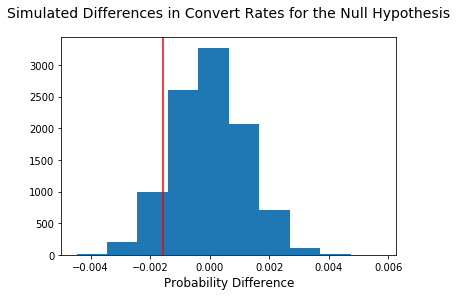

In [28]:
obs_diff = p_conv_treat - p_conv_control
p_diffs = np.array(p_diffs)
plt.hist(p_diffs)
plt.title("Simulated Differences in Convert Rates for the Null Hypothesis", fontsize=14,pad=20)
plt.xlabel("Probability Difference", fontsize=12)
plt.axvline(obs_diff, color='red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
(p_diffs > obs_diff).mean()

0.9056

> Proportion of p_diffs greater than the actual difference observed is 0.9035

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

- What we computed in part **j** is called p-value in scientific studies.
- p-value is the probability of observing your statistic (or one more extreme in favor of the alternative) if the null hypothesis is true.
- In our case the p-value is 0.9035 which is close to 1 and therefore we can say that we fail to reject null hypothesis
- Meaning, the probability of old page being better is equal or better than the new page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm

convert_old = df2[df2.landing_page == 'old_page'].converted.sum()
convert_new = df2[df2.landing_page == 'new_page'].converted.sum()
n_old = df2[df2.landing_page == 'old_page'].converted.count()
n_new = df2[df2.landing_page == 'new_page'].converted.count()
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [31]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_value

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

- **A positive z-score suggests that our data point is on the right side of the mean line on the bell curve**
- **p-value calculated using the proportions_ztest function is 0.9050, which is very close to the p-value we computed earlier in part j.**
- **With this calculation, we can confidently conclude that we fail to reject null hypothesis**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

- This is a case of Logistic Regression. In this scenario, we want to predict something that has only two possible outcomes.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [32]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [33]:
# add an intercept
df2['intercept'] = 1

# using pd.get_dummies to categorical columns
df2[['landing_page_new', 'landing_page_old']] = pd.get_dummies(df2['landing_page'])
df2[['ab_page_control','ab_page_treatment']] = pd.get_dummies(df2['group'])

C:\Program Files (x86)\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Program Files (x86)\Anaconda\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [34]:
# using landing_page_old and ab_page_control as baseline
df2.drop(['landing_page_old','ab_page_control'], axis=1, inplace=True)

C:\Program Files (x86)\Anaconda\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [35]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page_treatment']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [36]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 01 Jul 2020   Pseudo R-squ.:               8.077e-06
Time:                        17:31:57   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept            -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page_treatment    -0.0150      0.011     -1.311      0.190      -0.037       0.007
=====================================================================================
"""

In [37]:
# interprete the coefficients
1/np.exp(-0.0150)

1.015113064615719

> For each 1 unit decrease in ab_page_treatment, it is 1.015 time likely to get convert. It is not good enough to launch new webpage. P-value is 0.19

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

- The p-value calculated here is 0.190. I differs from Part II because logistic regression is a 2 tailed test. 0.190 > 0.05 ($\alpha$), which means, we still cannot reject the null hypothesis

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

- The convert rate may be more related to some other variables like age of the user, where the user lives, education of the user etc. Adding more variables that we think could affect the converts can be really helpful in seeing the impact.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [40]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [41]:
### Create the necessary dummy variables
df_new[['ca', 'uk', 'us']] = pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,landing_page_new,ab_page_treatment,ca,uk,us
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0,1,0


In [47]:
#consider Canada, CA as the baseline

log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'uk', 'us']])
result = log_mod.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 01 Jul 2020   Pseudo R-squ.:               1.521e-05
Time:                        17:41:58   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
uk             0.0507      0.028      1.786      0.074      -0.005       0.106
us             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

In [43]:
np.exp(0.0507), np.exp(0.0408)

(1.052007243765014, 1.0416437559600236)

Above results can be read as:

- users from UK are 1.0052 times more likely to convert as compared to users from canada
- users from US are 1.0416 times more likely to less convert as compared to users from us

This shows that the user location does not affect the new webpage conversion much.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [51]:
# Create additional columns specifying what user/country converted
df_new['page_us'] = df_new['us'] * df_new['ab_page_treatment']
df_new['page_uk'] = df_new['uk'] * df_new['ab_page_treatment']
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,landing_page_new,ab_page_treatment,ca,uk,us,page_us,page_uk
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1,0,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0,1,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0,1,0,0,1


In [52]:
### Fit Your Linear Model And Obtain the Results
log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page_treatment', 'us', 'uk', 'page_us', 'page_uk']])
result = log_mod.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 01 Jul 2020   Pseudo R-squ.:               3.482e-05
Time:                        17:44:02   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept            -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page_treatment    -0.0674      0.052     -1.297      0.195      -0.169       0.034
us                    0.0175      0.038      0.465      0.642      -0.056       0.091
uk                    0.0118      0.040      0.296      0.767      -0.066       0.090
page_us               0.0469      0.054      0.872      0.383      -0.059       0.152
page_uk               0.0783      0.057      1.378      0.168      -0.033       0.190
=====================================================================================
"""

> All the p-values are above 0.05. Therefore the interation between page and country have no significant effects on conversion.

<a id='conclusions'></a>
## Conclusions

Through this project we analyse if the company should implement a new page or keep the old for better visit rate. The following methods were used : Probability based approach, A/B test, Regression approach

**Probability based approach**

The probability that a user receives old or new page is 0.5001. This implies that the user has equal chance of receiving old or new page

**A/B test**

We found that the p_value is 0.9035. With such a p-value, we failed to reject null hypothesis, which implies we cannot say that the new page is better than old. By using the built-in stats.proportions_ztest we computed z-score and p-value which also implied failure to reject null hypothesis

**Regression Approach:**

We looked at exploring two possible outcomes. Whether new page is better or not.
With logistic regression results, we could conclude the same as A/B testing because the p value was below the threshhold for type 1 error. pvalue was 0.19 <br />
For analysing if more factors affect the result, an analysis was conducted using the country were the user clicks from. But the result showed that it do not have much impact.

**Limitations:**

1. Due to Change aversion effect, a group of users may give an unfair advantage to the older page
2. Similarly, due to Novelty effect, users may give an unfair advantage to the newer page
3. Duration of the experiment was found to be only 21 days. This is a very short period for such an analysis.

**Resources**
- https://en.wikipedia.org/wiki/Standard_score, https://www.statisticshowto.com/probability-and-statistics/z-score/, How to calculate z scores
- https://stackoverflow.com/questions/18215317/extracting-days-from-a-numpy-timedelta64-value , Date extraction from time delta
- https://en.wikipedia.org/wiki/One-_and_two-tailed_tests , One tailed and 2 tailed tests